In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from typing import List, Dict, Tuple

def calculate_accuracy_stats(df: pd.DataFrame) -> Dict[int, Tuple[float, float, int]]:
    """
    Calculate accuracy percentage and standard deviation for each race category.
    
    Args:
        df: DataFrame with 'race' and 'prediction' columns
        
    Returns:
        Dictionary mapping race categories to (accuracy_percentage, std_dev, count)
    """
    # Group by race and calculate prediction statistics
    stats = {}
    
    for race in range(7):  # 0-6 race categories
        race_df = df[df['race'] == race]
        
        if len(race_df) > 0:
            # Calculate accuracy and standard deviation
            accuracy = race_df['prediction'].mean() * 100
            
            # Calculate binomial standard deviation: sqrt(p*(1-p)/n)
            p = accuracy / 100
            n = len(race_df)
            std_dev = np.sqrt(p * (1-p) / n) * 100 if n > 0 else 0
            
            stats[race] = (accuracy, std_dev, n)
        else:
            stats[race] = (0, 0, 0)
            
    return stats

def plot_race_accuracy(file_paths: List[str], output_file: str = 'race_prediction_accuracy.png'):
    """
    Create a 4x2 subplot with bar charts showing prediction accuracy by race for each file.
    
    Args:
        file_paths: List of CSV file paths
        output_file: Path to save the output image
    """
    # Race category labels
    race_labels = {
        0: "East Asian",
        1: "Indian", 
        2: "Black",
        3: "White",
        4: "Middle Eastern",
        5: "Latino",
        6: "Southeast Asian"
    }
    
    # Create figure and subplots
    fig, axes = plt.subplots(4, 2, figsize=(20, 24))
    axes = axes.flatten()
    
    # Process each file
    for i, file_path in enumerate(file_paths):
        if i >= 8:  # Ensure we only process 8 files
            break
            
        # Get file name for the plot title
        file_name = os.path.basename(file_path)
        
        try:
            # Read CSV
            df = pd.read_csv(file_path)
            
            # Calculate accuracy statistics
            stats = calculate_accuracy_stats(df)
            
            # Prepare data for plotting
            races = list(range(7))
            accuracies = [stats[race][0] for race in races]
            std_devs = [stats[race][1] for race in races]
            
            # Plot bar chart
            ax = axes[i]
            bars = ax.bar(
                [race_labels[r] for r in races],
                accuracies,
                yerr=std_devs,
                capsize=5,
                color='royalblue',
                error_kw={'ecolor': 'red', 'lw': 2, 'capthick': 2}
            )
            
            # Add value labels on top of bars
            for bar, acc in zip(bars, accuracies):
                height = bar.get_height()
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,
                    f'{acc:.1f}%',
                    ha='center',
                    va='bottom',
                    fontsize=12
                )
            
            # Set labels and titles
            ax.set_title(f'File: {file_name}', fontsize=12)
            ax.set_ylabel('Accuracy (%)')
            ax.set_ylim(0, 110)  # Set y-axis from 0-110% to have space for labels
            
            # Rotate x-axis labels for better readability
            plt.setp(ax.get_xticklabels(), rotation=0, ha='center', rotation_mode='anchor')
            
        except Exception as e:
            # Handle errors for individual files
            ax = axes[i]
            ax.text(0.5, 0.5, f"Error processing {file_name}:\n{str(e)}", 
                   horizontalalignment='center', verticalalignment='center',
                   transform=ax.transAxes, fontsize=10, color='red')
            ax.set_title(f'File: {file_name}', fontsize=12)
    
    # Hide any unused subplots
    for j in range(i+1, 8):
        axes[j].set_visible(False)
    
    # Add common title and adjust layout
    plt.suptitle('Race-based Prediction Accuracy Across Files', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Save figure
    # plt.savefig(output_file, dpi=300, bbox_inches='tight')
    # print(f"Visualization saved to {output_file}")
    
    # Show plot
    plt.show()



Processing 8 files...


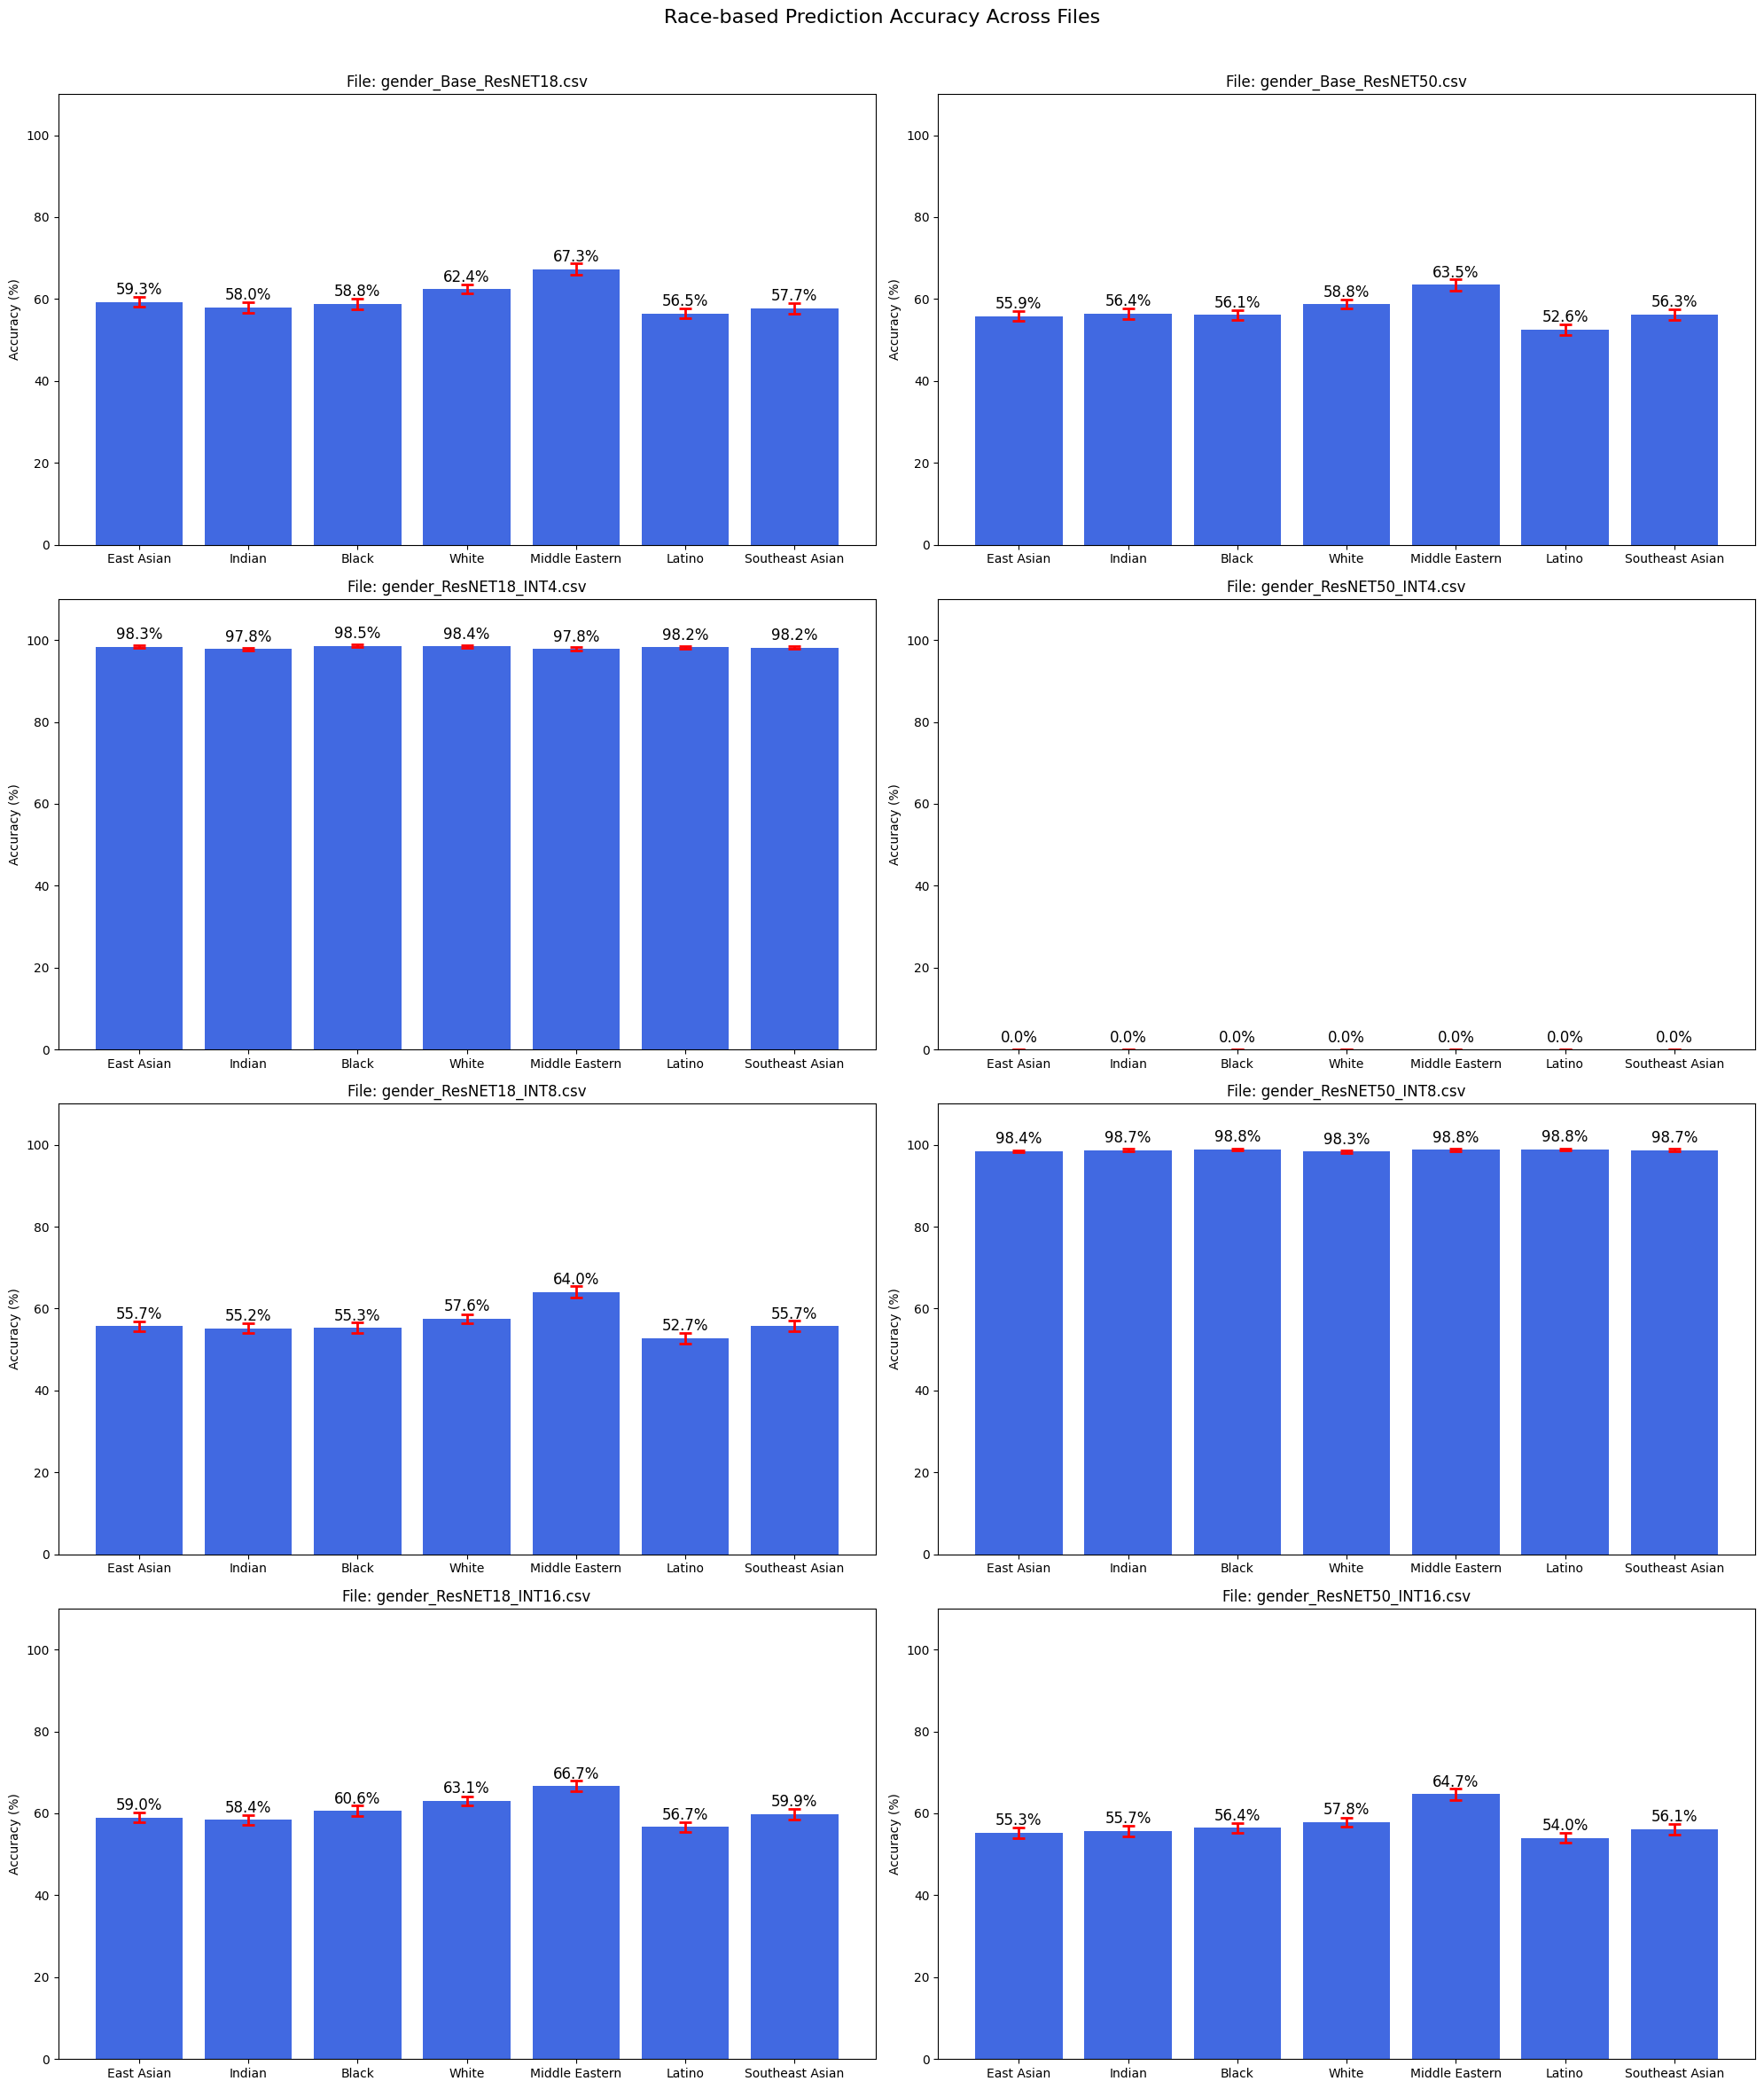

In [20]:
# Example usage
if __name__ == "__main__":
    # List of file paths to process
    file_paths = [
        "../results/ResFair/seed_27/gender_Base_ResNET18.csv",
        "../results/ResFair/seed_27/gender_Base_ResNET50.csv",
        "../results/ResFair/seed_27/gender_ResNET18_INT4.csv",
        "../results/ResFair/seed_27/gender_ResNET50_INT4.csv",
        "../results/ResFair/seed_27/gender_ResNET18_INT8.csv",
        "../results/ResFair/seed_27/gender_ResNET50_INT8.csv",
        "../results/ResFair/seed_27/gender_ResNET18_INT16.csv",
        "../results/ResFair/seed_27/gender_ResNET50_INT16.csv"
    ]
    
    # Check if files exist and warn about missing files
    existing_files = [f for f in file_paths if os.path.exists(f)]
    missing_files = [f for f in file_paths if f not in existing_files]
    
    if missing_files:
        print(f"Warning: The following files were not found: {', '.join(missing_files)}")
        print("Please make sure all files are in the correct location or update the file paths.")
    
    if existing_files:
        # Process the files that exist
        print(f"Processing {len(existing_files)} files...")
        plot_race_accuracy(existing_files)
    else:
        print("No files found to process. Please check the file paths.")

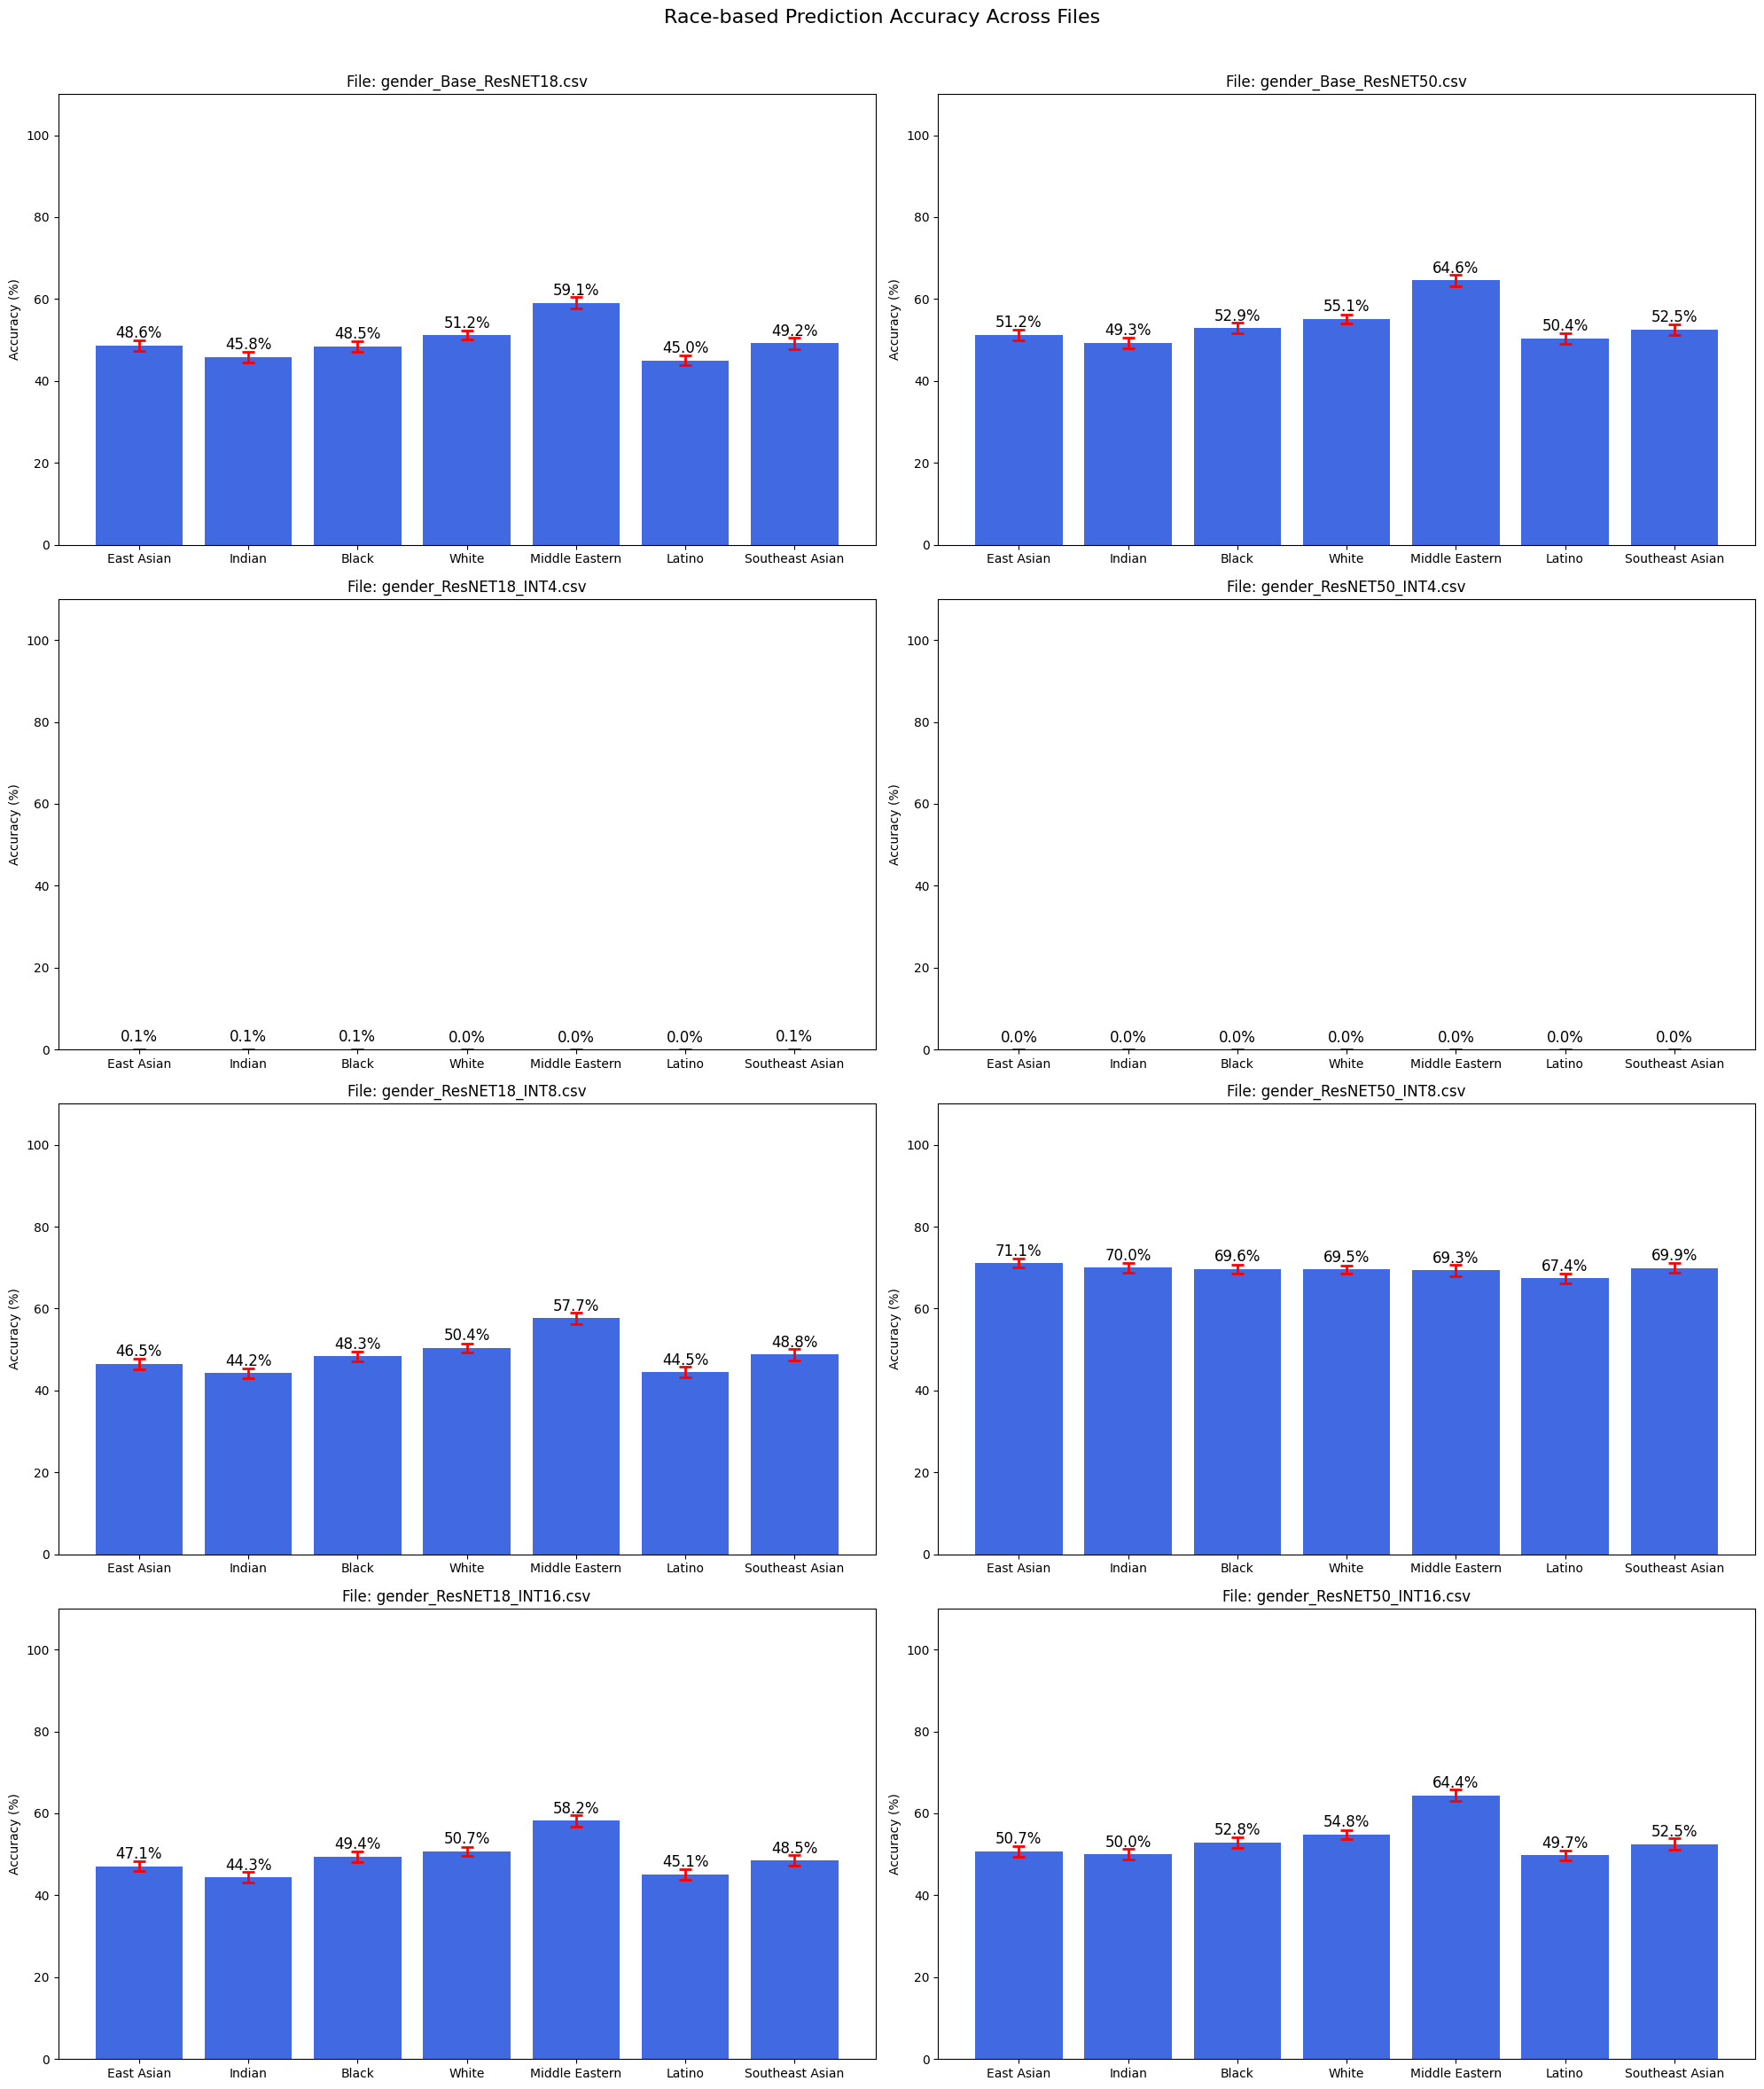

In [21]:
# Example usage
if __name__ == "__main__":
    # List of file paths to process
    file_paths = [
        "../results/ResFair/Seed_42/gender_Base_ResNET18.csv",
        "../results/ResFair/Seed_42/gender_Base_ResNET50.csv",
        "../results/ResFair/Seed_42/gender_ResNET18_INT4.csv",
        "../results/ResFair/Seed_42/gender_ResNET50_INT4.csv",
        "../results/ResFair/Seed_42/gender_ResNET18_INT8.csv",
        "../results/ResFair/Seed_42/gender_ResNET50_INT8.csv",
        "../results/ResFair/Seed_42/gender_ResNET18_INT16.csv",
        "../results/ResFair/Seed_42/gender_ResNET50_INT16.csv"
    ]
    # Check if files exist and warn about missing files
    existing_files = [f for f in file_paths if os.path.exists(f)]
    if existing_files:
        plot_race_accuracy(existing_files)
    else:
        print("No files found to process. Please check the file paths.")

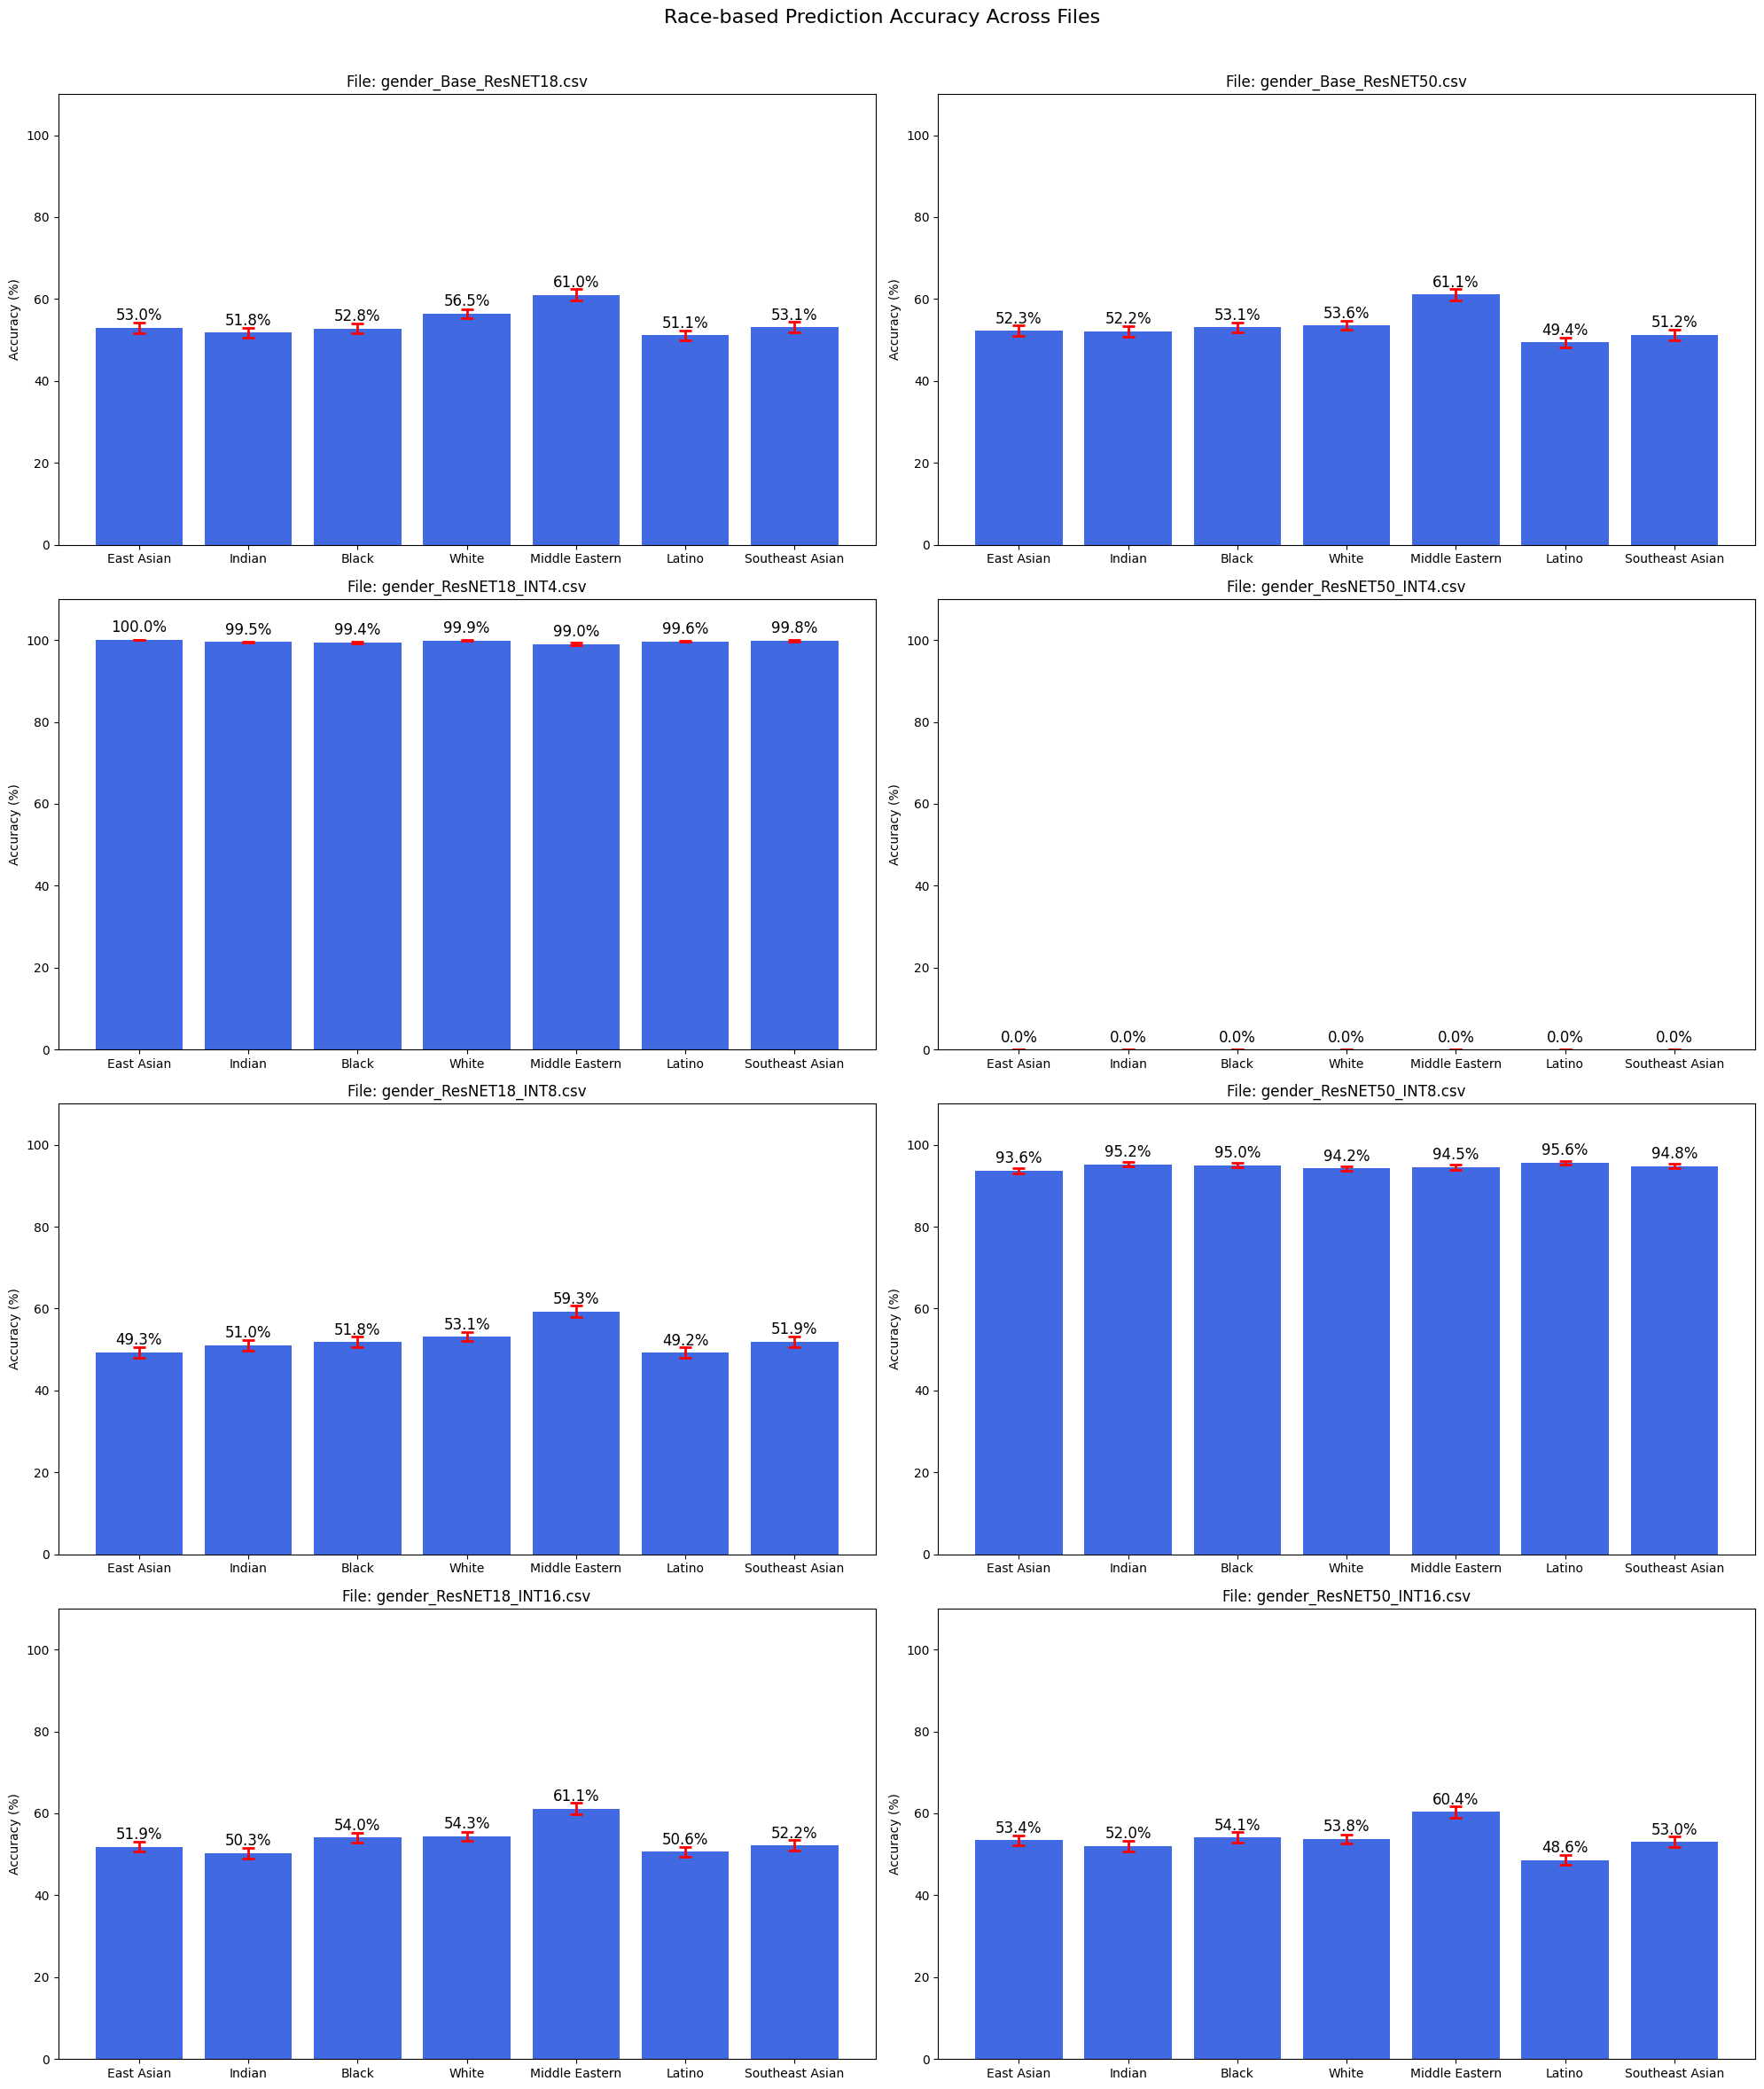

In [22]:
# Example usage
if __name__ == "__main__":
    # List of file paths to process
    file_paths = [
        "../results/ResFair/seed_68/gender_Base_ResNET18.csv",
        "../results/ResFair/seed_68/gender_Base_ResNET50.csv",
        "../results/ResFair/seed_68/gender_ResNET18_INT4.csv",
        "../results/ResFair/seed_68/gender_ResNET50_INT4.csv",
        "../results/ResFair/seed_68/gender_ResNET18_INT8.csv",
        "../results/ResFair/seed_68/gender_ResNET50_INT8.csv",
        "../results/ResFair/seed_68/gender_ResNET18_INT16.csv",
        "../results/ResFair/seed_68/gender_ResNET50_INT16.csv"
    ]
    # Check if files exist and warn about missing files
    existing_files = [f for f in file_paths if os.path.exists(f)]
    if existing_files:
        plot_race_accuracy(existing_files)
    else:
        print("No files found to process. Please check the file paths.")

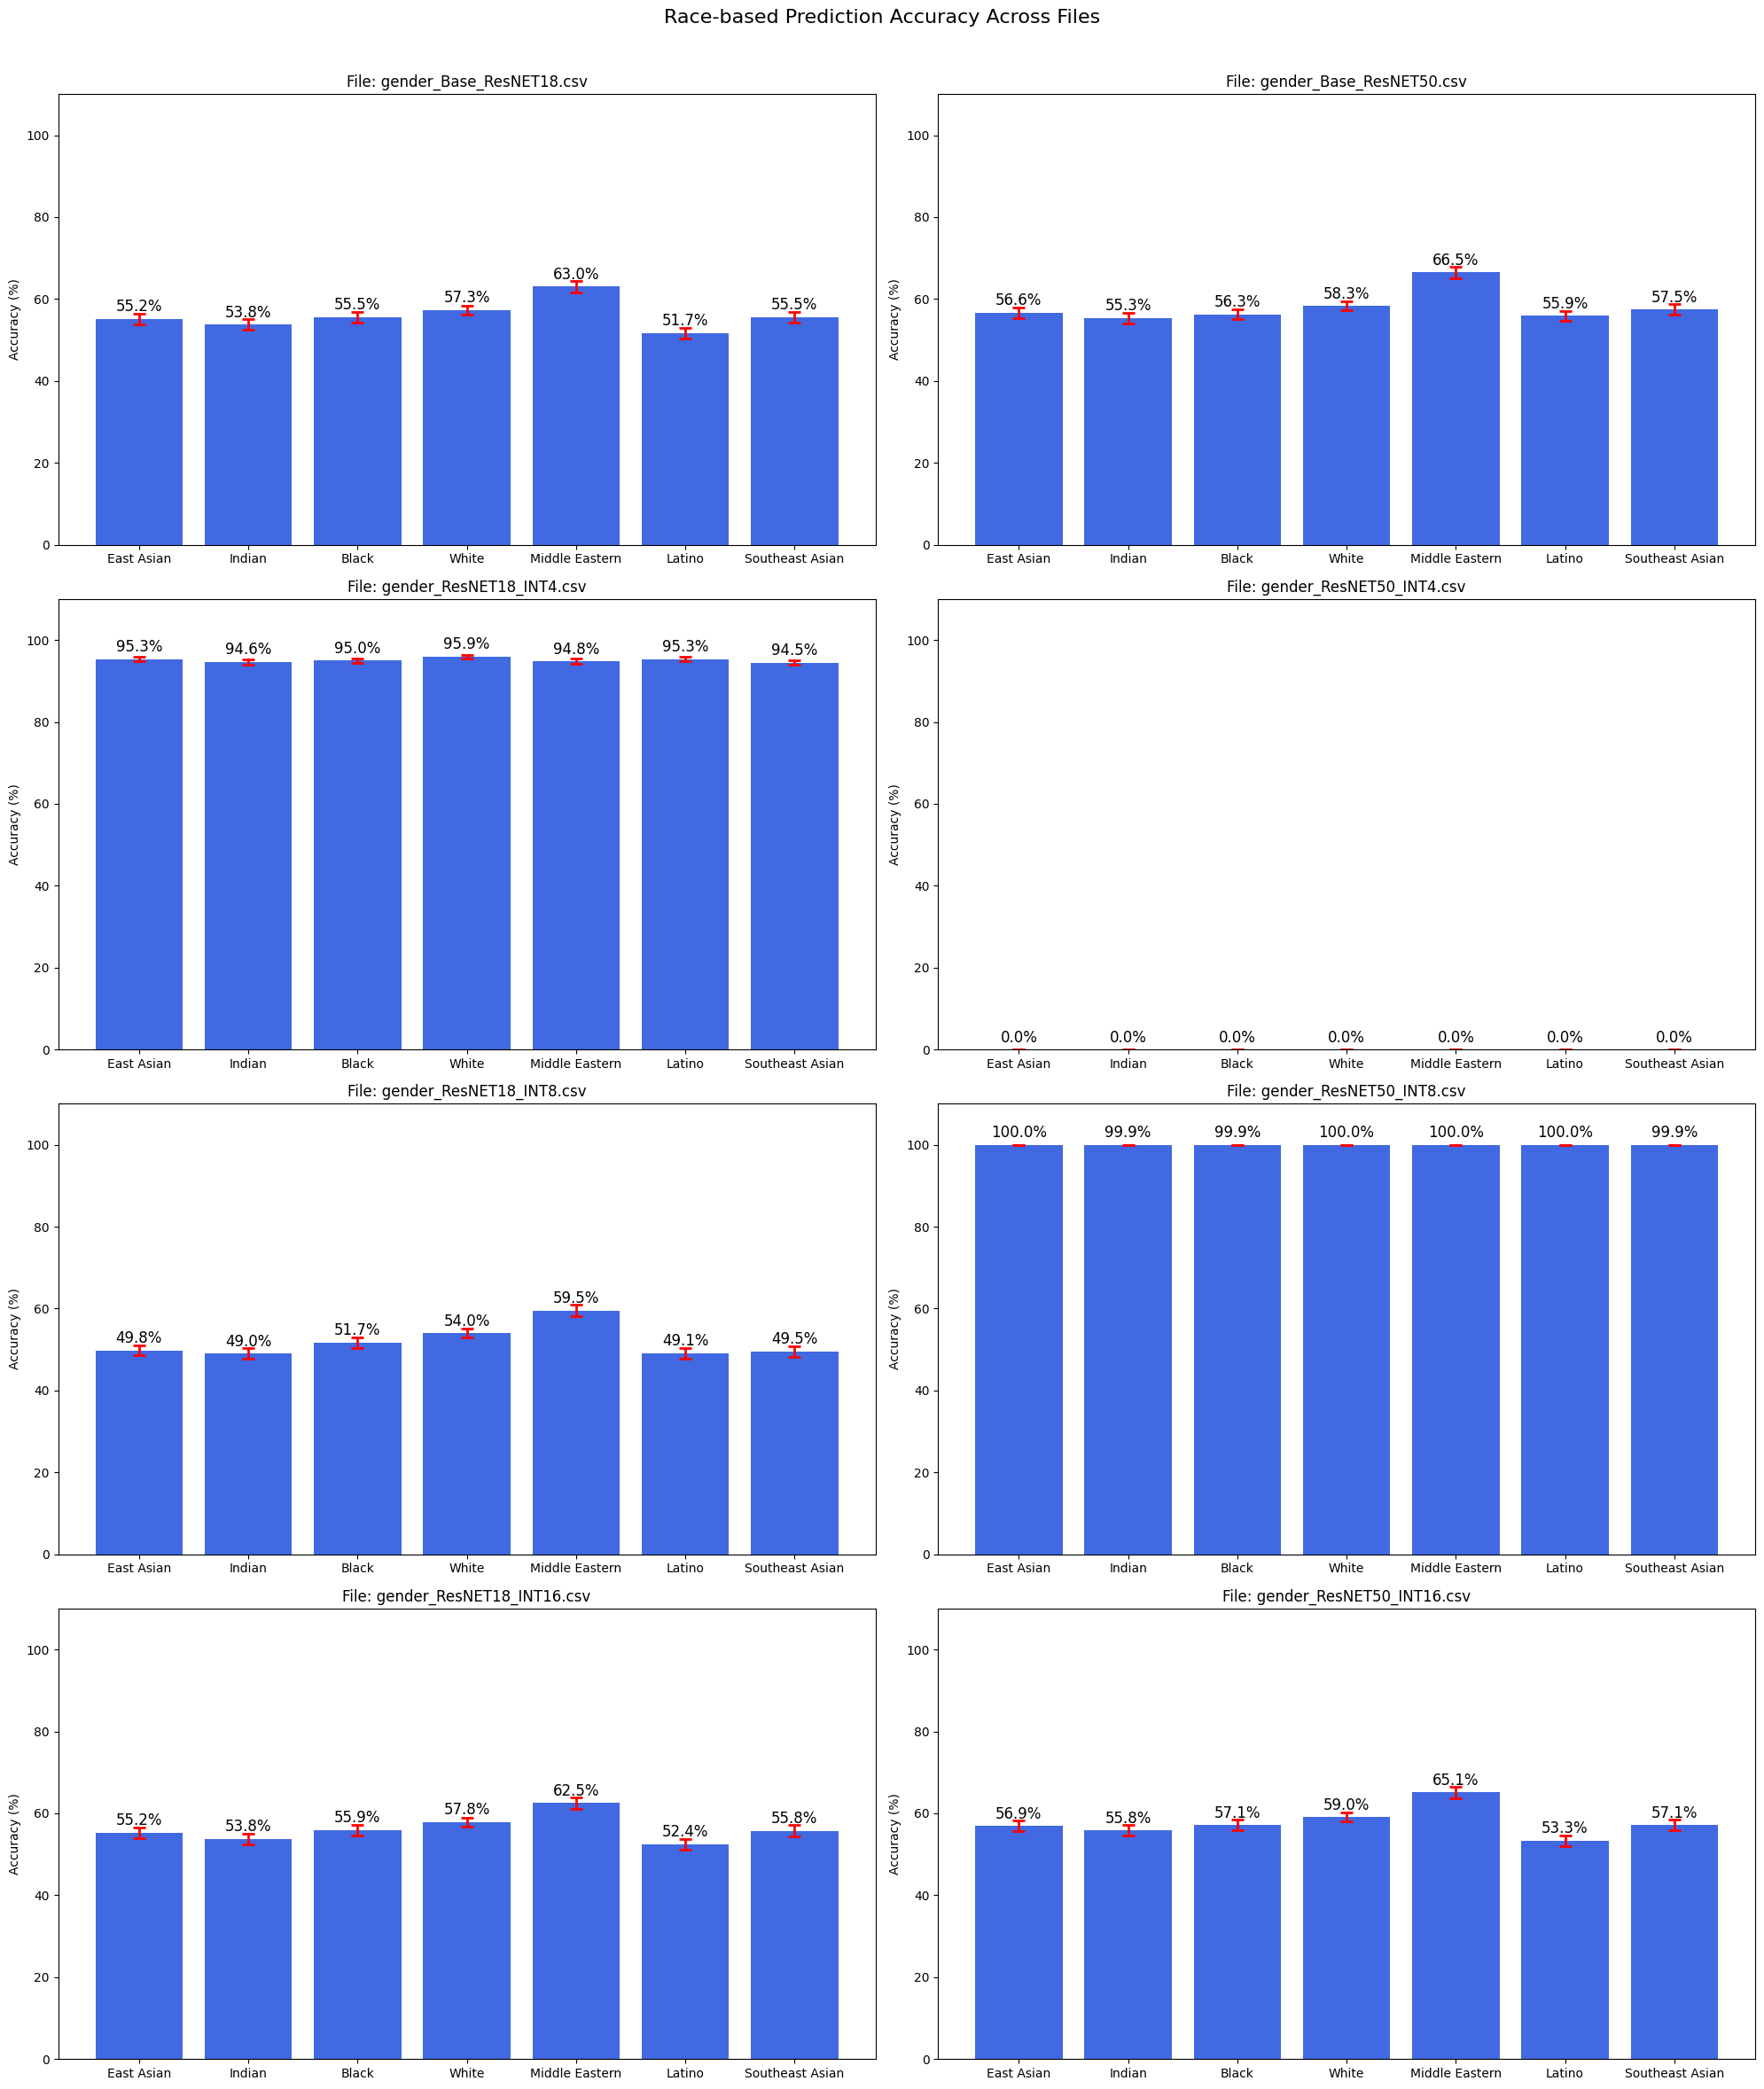

In [23]:
# Example usage
if __name__ == "__main__":
    # List of file paths to process
    file_paths = [
        "../results/ResFair/Seed_80/gender_Base_ResNET18.csv",
        "../results/ResFair/Seed_80/gender_Base_ResNET50.csv",
        "../results/ResFair/Seed_80/gender_ResNET18_INT4.csv",
        "../results/ResFair/Seed_80/gender_ResNET50_INT4.csv",
        "../results/ResFair/Seed_80/gender_ResNET18_INT8.csv",
        "../results/ResFair/Seed_80/gender_ResNET50_INT8.csv",
        "../results/ResFair/Seed_80/gender_ResNET18_INT16.csv",
        "../results/ResFair/Seed_80/gender_ResNET50_INT16.csv"
    ]
    # Check if files exist and warn about missing files
    existing_files = [f for f in file_paths if os.path.exists(f)]
    if existing_files:
        plot_race_accuracy(existing_files)
    else:
        print("No files found to process. Please check the file paths.")

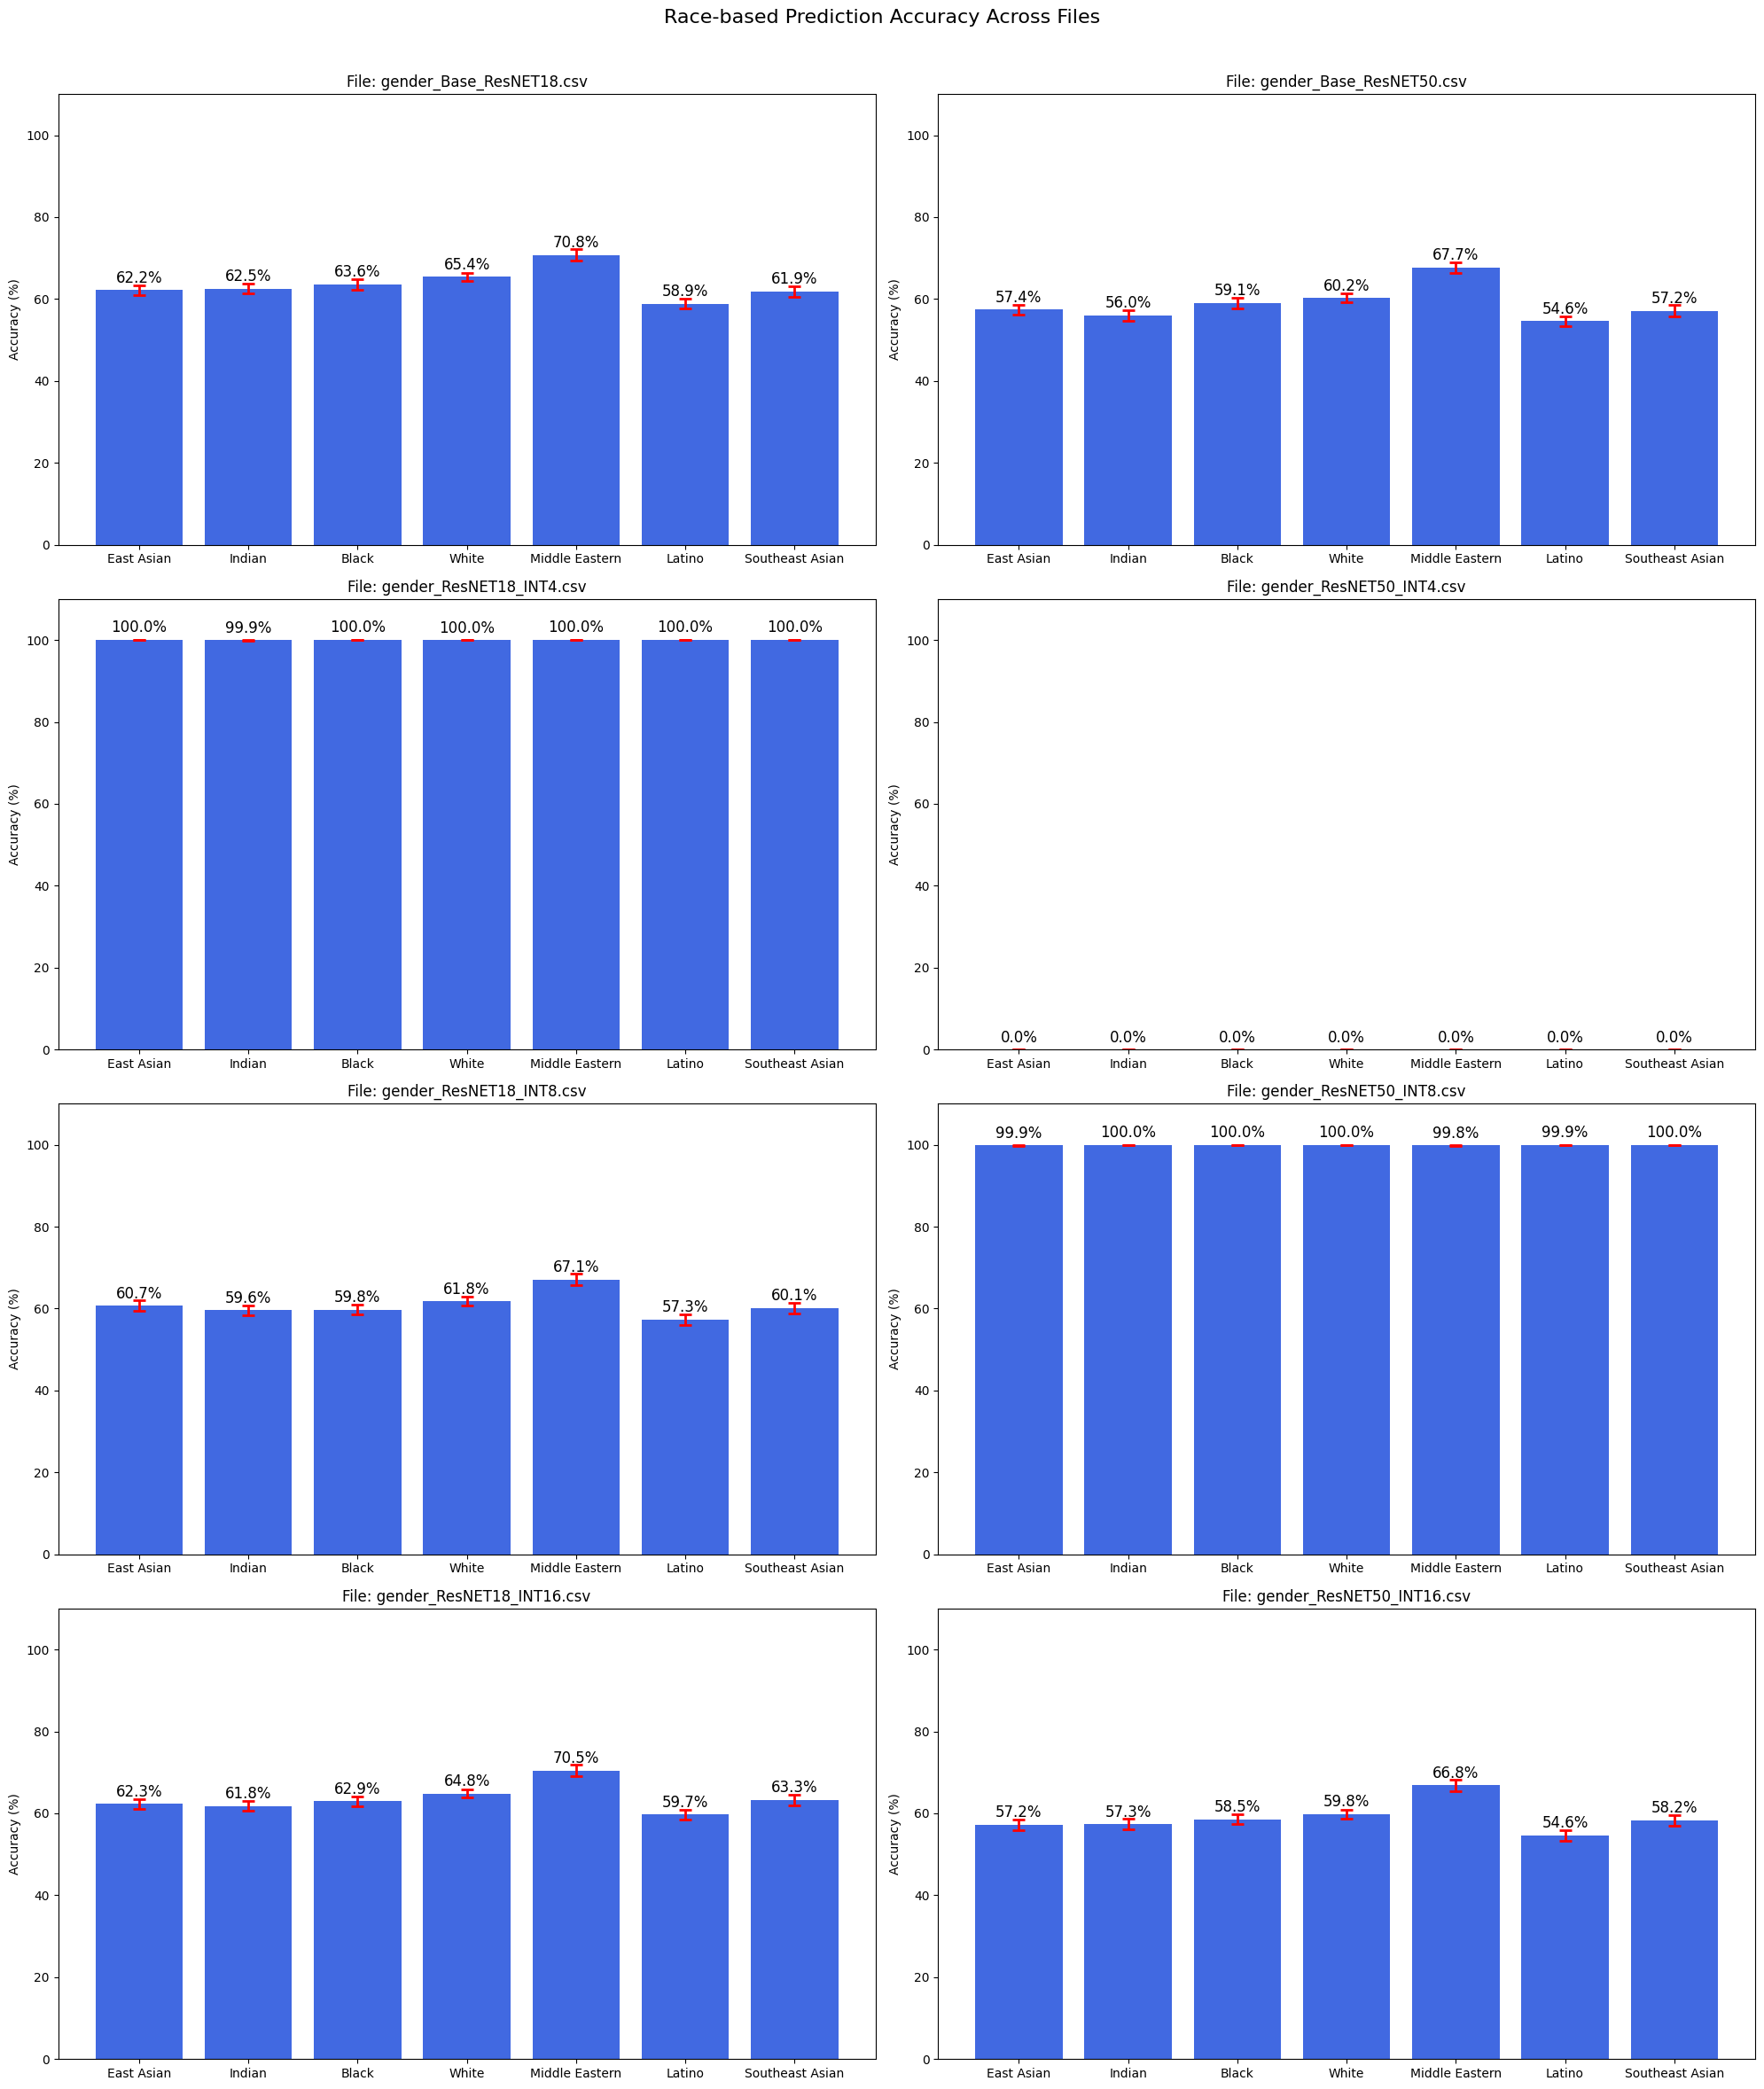

In [24]:
# Example usage
if __name__ == "__main__":
    # List of file paths to process
    file_paths = [
        "../results/ResFair/seed_708/gender_Base_ResNET18.csv",
        "../results/ResFair/seed_708/gender_Base_ResNET50.csv",
        "../results/ResFair/seed_708/gender_ResNET18_INT4.csv",
        "../results/ResFair/seed_708/gender_ResNET50_INT4.csv",
        "../results/ResFair/seed_708/gender_ResNET18_INT8.csv",
        "../results/ResFair/seed_708/gender_ResNET50_INT8.csv",
        "../results/ResFair/seed_708/gender_ResNET18_INT16.csv",
        "../results/ResFair/seed_708/gender_ResNET50_INT16.csv"
    ]
    # Check if files exist and warn about missing files
    existing_files = [f for f in file_paths if os.path.exists(f)]
    if existing_files:
        plot_race_accuracy(existing_files)
    else:
        print("No files found to process. Please check the file paths.")